### 0. Imports

In [35]:
from pathlib import Path
from ydata_profiling import ProfileReport
from IPython.display import display

import numpy as np
import pandas as pd
import hashlib
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Constants

In [36]:
exclude_wednesday_draws = True

### 2. Data import

In [37]:
# preprocessed CSV
lotto_csv_path = Path.joinpath(Path.cwd().parent, 'data\\preprocessed\LOTTO6aus49_1990-2023.csv').resolve()
print(f'Lotto CSV file path: {lotto_csv_path}')

df = pd.read_csv(lotto_csv_path, index_col=0)
if exclude_wednesday_draws:
    df.drop(df[df.Day == 'MI'].index, inplace=True)
df.Day = df.Day.astype('category')
df.info()

Lotto CSV file path: T:\repos\GamblingEvaluator\gamblingEvaluator\data\preprocessed\LOTTO6aus49_1990-2023.csv
<class 'pandas.core.frame.DataFrame'>
Index: 1763 entries, 0 to 2955
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Year          1763 non-null   int64   
 1   MM/DD         1763 non-null   object  
 2   Day           1763 non-null   category
 3   GWZ1          1763 non-null   int64   
 4   GWZ2          1763 non-null   int64   
 5   GWZ3          1763 non-null   int64   
 6   GWZ4          1763 non-null   int64   
 7   GWZ5          1763 non-null   int64   
 8   GWZ6          1763 non-null   int64   
 9   Zz            1763 non-null   int64   
 10  Sz            1763 non-null   int64   
 11  Spieleinsatz  1763 non-null   float64 
 12  I             1763 non-null   int64   
 13  6T_Zz         1763 non-null   float64 
 14  II            1763 non-null   int64   
 15  6T            1763 non-null   float

In [38]:
display(df.head())
display(df.tail())

,Year,MM/DD,Day,GWZ1,GWZ2,GWZ3,GWZ4,GWZ5,GWZ6,Zz,...,4T,VII,3T_Zz,VIII,3T,IX,2T_Zz,Total_payout,Date,gwzx_sum
0,1990,06/01/,SA,44,45,48,12,46,30,2,...,49.697388,0,0.0,1607023,5.368545,0,0.0,2.866375e+07,1990-01-06,225
1,1990,13/01/,SA,37,33,12,6,42,15,9,...,59.309643,0,0.0,1772874,4.908384,0,0.0,2.892594e+07,1990-01-13,145
2,1990,20/01/,SA,8,42,40,1,17,18,10,...,72.091890,0,0.0,1648051,5.215158,0,0.0,2.855900e+07,1990-01-20,126
3,1990,27/01/,SA,12,10,42,6,9,37,44,...,50.464320,0,0.0,1999733,4.243707,0,0.0,2.826920e+07,1990-01-27,116
4,1990,03/02/,SA,29,46,48,42,35,20,45,...,90.396070,0,0.0,1446763,6.391125,0,0.0,3.074607e+07,1990-02-03,220


,Year,MM/DD,Day,GWZ1,GWZ2,GWZ3,GWZ4,GWZ5,GWZ6,Zz,...,4T,VII,3T_Zz,VIII,3T,IX,2T_Zz,Total_payout,Date,gwzx_sum
2947,2023,16/09/,SA,32,30,19,36,41,46,0,...,49.7,64906,24.9,663134,11.5,481296,6.0,5.892345e+07,2023-09-16,204
2949,2023,23/09/,SA,33,11,39,32,17,12,0,...,39.2,101140,16.0,873012,8.7,713353,6.0,6.660778e+07,2023-09-23,144
2951,2023,30/09/,SA,45,42,17,20,36,1,0,...,63.0,97765,23.7,833015,13.1,759268,6.0,8.307498e+07,2023-09-30,161
2953,2023,07/10/,SA,23,32,11,22,42,14,0,...,52.7,49283,29.3,593407,11.5,370095,6.0,2.511946e+07,2023-10-07,144
2955,2023,14/10/,SA,35,31,10,22,8,29,0,...,60.4,77007,17.7,530896,12.1,597696,6.0,2.264349e+07,2023-10-14,135


### 3. EDA

#### 3.0 Generic Analysis

In [39]:
# Enable for interactive (generic) report
# ProfileReport(df, title="EDA Report", explorative=True).to_notebook_iframe()

In [40]:
# reset backend for the remaining graphics
%matplotlib inline

#### 3.1 Stakes

In [41]:
df[['Year','GWZ1','GWZ2','GWZ3','GWZ4','GWZ5','GWZ6','Zz','Sz','Spieleinsatz']].sort_values(by=['Spieleinsatz','Year'], ascending=False).head(10)

,Year,GWZ1,GWZ2,GWZ3,GWZ4,GWZ5,GWZ6,Zz,Sz,Spieleinsatz
244,1994,42,18,34,3,45,37,1,7,176628100.0
243,1994,30,17,16,5,42,24,39,5,175037150.0
1299,2007,35,29,12,23,41,21,8,0,151562240.0
242,1994,9,24,38,10,5,8,6,9,148401060.0
1179,2006,30,34,31,41,48,28,17,4,148259680.0
448,1998,7,11,15,22,37,39,42,3,143515200.0
241,1994,41,4,33,36,40,27,18,3,128809736.0
627,2001,42,18,6,40,35,29,44,6,128436930.0
504,1999,24,35,30,34,17,19,26,0,128140860.0
1421,2009,9,11,17,31,7,14,1,2,127342760.0


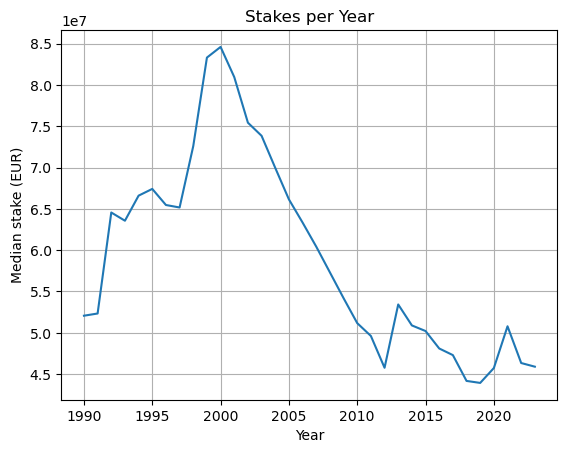

In [42]:
df_t = df.groupby('Year')['Spieleinsatz'].median()
plt.plot(df_t)
plt.grid(True)
plt.xlabel('Year')
plt.ylabel('Median stake (EUR)')
plt.title('Stakes per Year')
plt.show()

<b>Note:</b><br>Stakes did not significantly or systematically rise over the years.

#### 3.2 Payout

In [43]:
payout_columns = ['6T_Zz','6T','5T_Zz','5T','4T_Zz','4T','3T_Zz','3T','2T_Zz']

##### 3.2.1 Payouts per winning class

In [44]:
df[payout_columns].describe()

,6T_Zz,6T,5T_Zz,5T,4T_Zz,4T,3T_Zz,3T,2T_Zz
count,1.763000e+03,1.763000e+03,1.763000e+03,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000
mean,6.435241e+06,1.071407e+06,7.287350e+04,3592.171459,136.605324,51.222172,26.657313,8.823754,1.639251
std,6.645723e+06,1.512637e+06,2.431844e+05,1340.955857,96.996663,15.891853,11.037841,2.876562,2.461112
min,0.000000e+00,0.000000e+00,2.013000e+02,194.239070,0.000000,19.100000,0.000000,3.067740,0.000000
25%,2.526157e+06,4.234789e+05,1.571460e+04,2619.008100,0.000000,39.700000,20.100000,5.521932,0.000000
50%,4.227836e+06,7.297477e+05,4.102770e+04,3441.084200,157.426200,48.400000,26.100000,9.509994,0.000000
75%,8.414888e+06,1.325093e+06,6.539688e+04,4408.726150,207.350000,60.383350,33.266926,10.900000,5.000000
max,4.980906e+07,3.705064e+07,3.985902e+06,9699.121000,450.400000,107.831060,57.724644,15.900000,6.000000


In [45]:
def plot_payouts_per_year(df, column_names, skip_years, use_log):
    payouts = df.groupby('Year')[column_names].mean()[skip_years:]
    if use_log:
        payouts = np.log(payouts)
    plt.plot(payouts)
    plt.grid(True)
    plt.xlabel('Year')
    plt.ylabel(f'Payout (EUR) - Log scaled: {use_log}')
    plt.title('Payouts per year')
    plt.show()

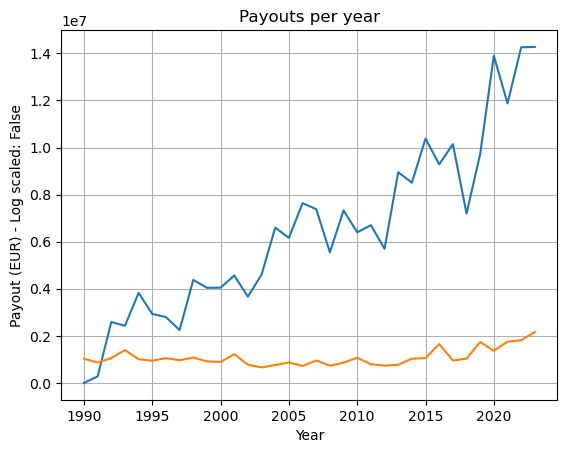

In [46]:
plot_payouts_per_year(df, ['6T_Zz', '6T'], 0, False)

<b>Note:</b><br>Winning class 6T_Zz with significant increase in possible payouts. In fact the highest among all classes.<br>Contrarily, 6T without significant increase.

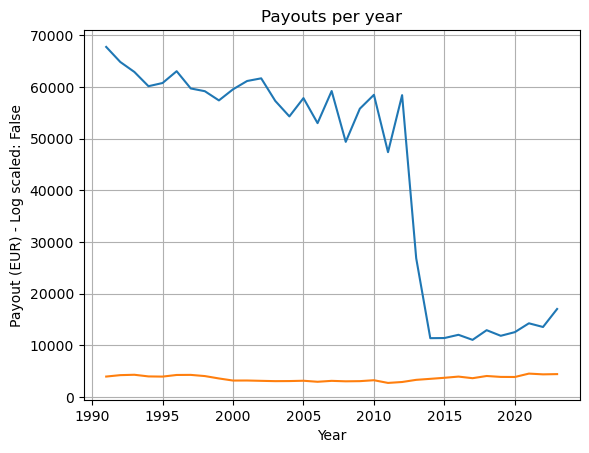

In [47]:
plot_payouts_per_year(df, ['5T_Zz', '5T'], 1, False)

<b>Note:</b><br>Winning class 5T_Zz with significant decrease in possible payouts. Payouts were potentially moved to higher class 6T_Zz. Possibly, to boost attractiveness of the lottery by having higher max payouts in general.<br>Contrarily, 5T without significant change.

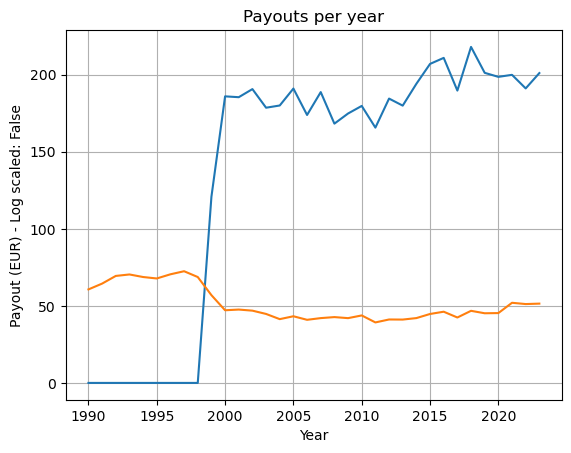

In [48]:
plot_payouts_per_year(df, ['4T_Zz', '4T'], 0, False)

<b>Note:</b><br>Winning class 4T_Zz did not exist before 1998. Payouts of both 4T_Zz and 4T did not change significantly over the years.

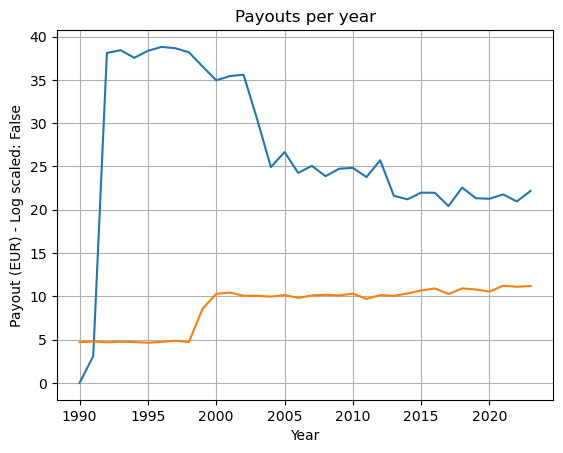

In [49]:
plot_payouts_per_year(df, ['3T_Zz', '3T'], 0, False)

<b>Note:</b><br>Winning class 3T_Zz did not exist before 1992. Payouts of 3T_Zz slightly decreased, whereas 3T slightly increased.

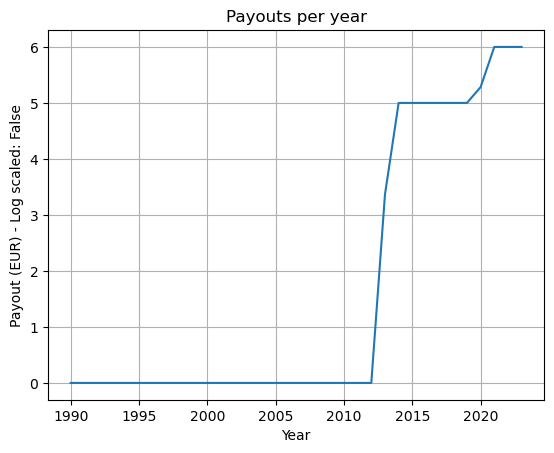

In [50]:
plot_payouts_per_year(df, ['2T_Zz'], 0, False)

<b>Note:</b><br>Winning class 2T_Zz did not exist before 2013. Payouts of 2T_Zz were originally introduced with 5 Euro and later on adjusted to 6.

##### 3.2.2 Top 3 profits per category

In [51]:
def get_n_highest_profits_by_category(df, category, n):
    return df.sort_values(by=category, ascending=False).loc[:, ['Year','GWZ1','GWZ2','GWZ3','GWZ4','GWZ5','GWZ6','Zz','Sz','Spieleinsatz', category]].head(n)

l = []
for col_name in payout_columns:
    l.append(get_n_highest_profits_by_category(df, col_name, 3))
pd.concat(l, axis=0)

,Year,GWZ1,GWZ2,GWZ3,GWZ4,GWZ5,GWZ6,Zz,Sz,Spieleinsatz,6T_Zz,6T,5T_Zz,5T,4T_Zz,4T,3T_Zz,3T,2T_Zz
2773,2022,34,43,48,49,5,42,0,9,65362532.0,49809056.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2797,2022,33,17,27,45,5,43,0,6,59235236.0,48147172.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2655,2020,27,28,13,2,47,35,0,8,65558120.0,45705492.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2181,2016,15,5,13,30,44,26,0,9,67508350.0,NaN,37050636.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2507,2019,31,34,45,8,1,43,0,1,54733940.0,NaN,31482812.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2951,2023,45,42,17,20,36,1,0,0,73630936.0,NaN,22500000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,1990,7,36,48,34,46,4,41,0,53145348.0,NaN,NaN,3985901.5,NaN,NaN,NaN,NaN,NaN,NaN
41,1990,43,46,15,24,34,25,18,0,51030816.0,NaN,NaN,3827311.5,NaN,NaN,NaN,NaN,NaN,NaN
17,1990,20,7,8,23,35,42,43,0,50800450.0,NaN,NaN,3810033.2,NaN,NaN,NaN,NaN,NaN,NaN
75,1991,34,28,26,1,48,25,6,0,52159744.0,NaN,NaN,NaN,9699.121,NaN,NaN,NaN,NaN,NaN


<b>Key findings:</b><br>The winning classes have an order of magnitude difference in payouts, ranging from ~5e7 to 5e0 Euro.<br>The lottery system has on the one hand been polarized to allow for increasingly higher max payouts through the highest winning class (6T_ZZ), while on lower possible payouts were only marginally bolstered.<br>As a result, it has become even more attractive than anytime before to aim for the maximum possible win.<br>Small payouts were introduced in 2013 potentially to create a small incentive to keep playing while hoping for a big win.

#### 3.3 Payout/Stake Ratio

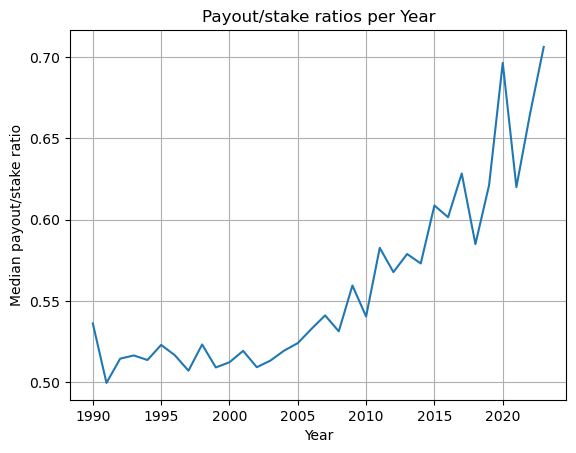

In [52]:
# profit/stake ratio by year
df_s = df.groupby('Year')['Spieleinsatz'].median()
df_tp = df.groupby('Year')['Total_payout'].median()
ratios = df_tp / df_s

plt.plot(ratios)
plt.grid(True)
plt.xlabel('Year')
plt.ylabel('Median payout/stake ratio')
plt.title('Payout/stake ratios per Year')
plt.show()

<b>Key findings:</b><br>The profit to stake ratio increased significantly over the years from around .5 to .7.<br>This is most likely driven by the increase of class 6T_Zz payout increase.

### 3.4 Winning numbers

In [53]:
def plot_gwz_histograms(df, colors, column_names):
    _, axs = plt.subplots(3, 2, figsize=(16, 10))
    sns.histplot(data=df, x=column_names[0], color=colors[0], label=column_names[0], kde=True, ax=axs[0, 0], bins=49)
    axs[0,0].grid(axis='y')
    sns.histplot(data=df, x=column_names[1], color=colors[1], label=column_names[1], kde=True, ax=axs[0, 1], bins=49)
    axs[0,1].grid(axis='y')
    sns.histplot(data=df, x=column_names[2], color=colors[2], label=column_names[2], kde=True, ax=axs[1, 0], bins=49)
    axs[1,0].grid(axis='y')
    sns.histplot(data=df, x=column_names[3], color=colors[3], label=column_names[3], kde=True, ax=axs[1, 1], bins=49)
    axs[1,1].grid(axis='y')
    sns.histplot(data=df, x=column_names[4], color=colors[4], label=column_names[4], kde=True, ax=axs[2, 0], bins=49)
    axs[2,0].grid(axis='y')
    sns.histplot(data=df, x=column_names[5], color=colors[5], label=column_names[5], kde=True, ax=axs[2, 1], bins=49)
    axs[2,1].grid(axis='y')
    plt.legend() 
    plt.show()

def plot_percentages(df, column_name, color, ignore_zero):
    plt.rcParams['figure.figsize'] = [9, 3]
    plt.figure(layout='tight')
    if ignore_zero:
        ax = df[df[column_name].index != 0][column_name].sort_values(ascending=False).plot.bar(color=color)
    else:
        ax = df[column_name].sort_values(ascending=False).plot.bar(color=color)
    ax.grid(axis='y')
    ax.bar_label(ax.containers[0], rotation=90)
    ax.set_title(column_name)
    plt.show()

def get_gwz_percent(df, column_name, remove_entry):
    row_count = len(df[df[column_name] != remove_entry])
    return np.round((df[df[column_name] != remove_entry][column_name].value_counts() / row_count) * 100, 2)

In [54]:
winning_numbers = ['GWZ1','GWZ2','GWZ3','GWZ4','GWZ5','GWZ6','Zz','Sz']
gwz_colors = ['skyblue','bisque','turquoise','orchid','lightsalmon','lightgray','plum','lightgreen']

#### 3.4.1 Occurrences (Absolute)

GWZx

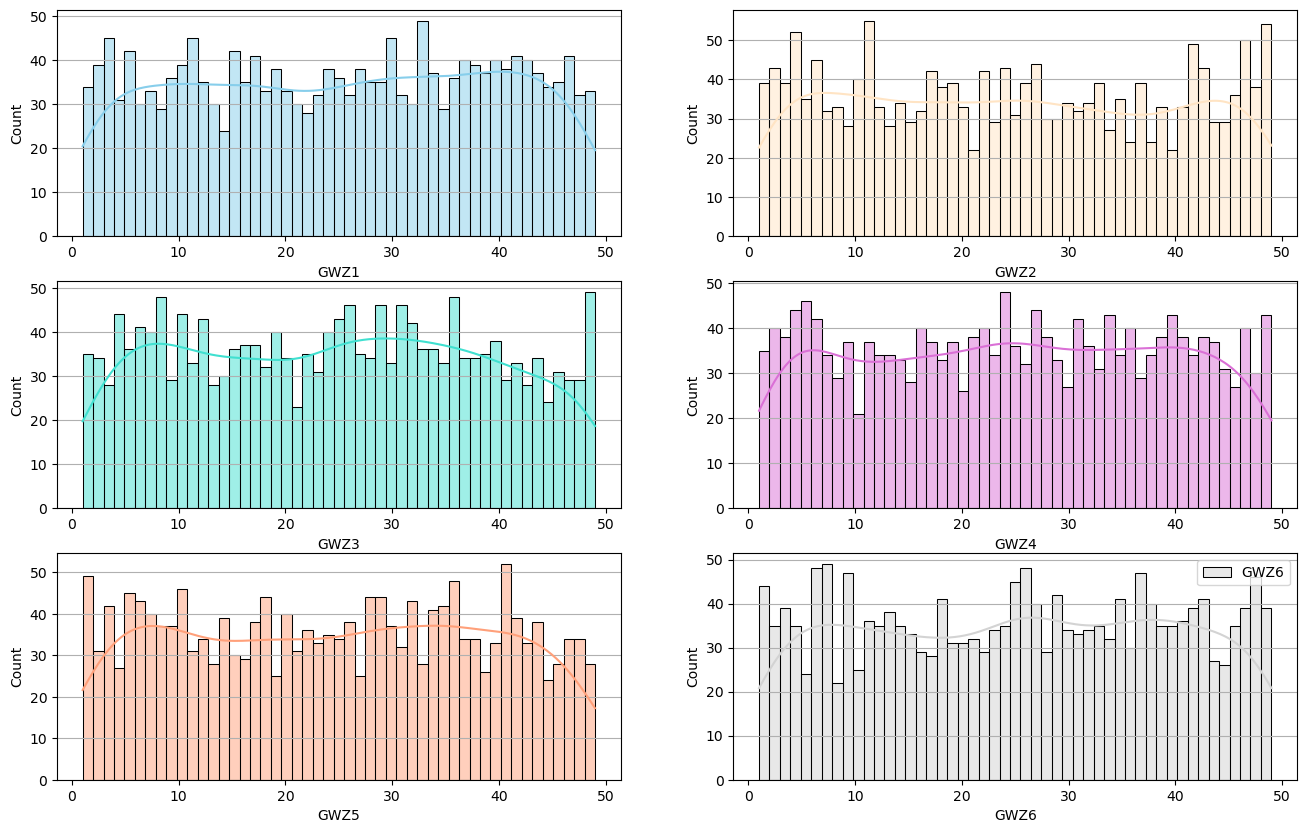

In [55]:
plot_gwz_histograms(df, gwz_colors, winning_numbers)

#### 3.4.2 Top Occurrences (in Percent)

Top 10 most likely drawn numbers

In [56]:
df_t = pd.DataFrame({'GWZ_1_Percent': get_gwz_percent(df, winning_numbers[0], 0),
                     'GWZ_2_Percent': get_gwz_percent(df, winning_numbers[1], 0),
                     'GWZ_3_Percent': get_gwz_percent(df, winning_numbers[2], 0),
                     'GWZ_4_Percent': get_gwz_percent(df, winning_numbers[3], 0),
                     'GWZ_5_Percent': get_gwz_percent(df, winning_numbers[4], 0),
                     'GWZ_6_Percent': get_gwz_percent(df, winning_numbers[5], 0),
                     'Zz_Percent': get_gwz_percent(df, winning_numbers[6], -1),
                     'Sz_Percent': get_gwz_percent(df, winning_numbers[7], -1)})

In [57]:
display(df_t.head(5))
display(df_t.tail(5))

,GWZ_1_Percent,GWZ_2_Percent,GWZ_3_Percent,GWZ_4_Percent,GWZ_5_Percent,GWZ_6_Percent,Zz_Percent,Sz_Percent
0,NaN,NaN,NaN,NaN,NaN,NaN,31.03,15.09
1,1.93,2.21,1.99,1.99,2.78,2.50,1.53,9.98
2,2.21,2.44,1.93,2.27,1.76,1.99,1.30,9.30
3,2.55,2.21,1.59,2.16,2.38,2.21,1.13,8.85
4,1.76,2.95,2.50,2.50,1.53,1.99,1.70,9.53


,GWZ_1_Percent,GWZ_2_Percent,GWZ_3_Percent,GWZ_4_Percent,GWZ_5_Percent,GWZ_6_Percent,Zz_Percent,Sz_Percent
45,1.93,1.64,1.36,1.76,1.36,1.47,1.47,NaN
46,1.99,2.04,1.76,1.53,1.59,1.99,1.64,NaN
47,2.33,2.84,1.64,2.27,1.93,2.21,1.19,NaN
48,1.82,2.16,1.64,1.70,1.93,2.61,1.19,NaN
49,1.87,3.06,2.78,2.44,1.59,2.21,1.19,NaN


In [58]:
pd.DataFrame({'Gwz_1_Top10' : df_t['GWZ_1_Percent'].sort_values(ascending=False).head(10).index.to_list(),
              'Gwz_2_Top10' : df_t['GWZ_2_Percent'].sort_values(ascending=False).head(10).index.to_list(),
              'Gwz_3_Top10' : df_t['GWZ_3_Percent'].sort_values(ascending=False).head(10).index.to_list(),
              'Gwz_4_Top10' : df_t['GWZ_4_Percent'].sort_values(ascending=False).head(10).index.to_list(),
              'Gwz_5_Top10' : df_t['GWZ_5_Percent'].sort_values(ascending=False).head(10).index.to_list(),
              'Gwz_6_Top10' : df_t['GWZ_6_Percent'].sort_values(ascending=False).head(10).index.to_list(),
              'Zz_Top10' : df_t['Zz_Percent'].sort_values(ascending=False).head(10).index.to_list(),
              'Sz_Top10' : df_t['Sz_Percent'].sort_values(ascending=False).head(10).index.to_list()})

,Gwz_1_Top10,Gwz_2_Top10,Gwz_3_Top10,Gwz_4_Top10,Gwz_5_Top10,Gwz_6_Top10,Zz_Top10,Sz_Top10
0,33,11,49,24,41,7,0,0
1,3,49,36,5,1,26,16,7
2,30,4,8,4,36,6,38,1
3,11,47,31,27,10,9,31,5
4,5,42,29,49,5,37,8,4
5,15,6,26,34,29,48,35,2
6,42,27,10,40,18,25,40,8
7,47,43,4,6,28,1,44,9
8,17,24,12,31,6,29,4,3
9,37,2,25,16,32,18,9,6


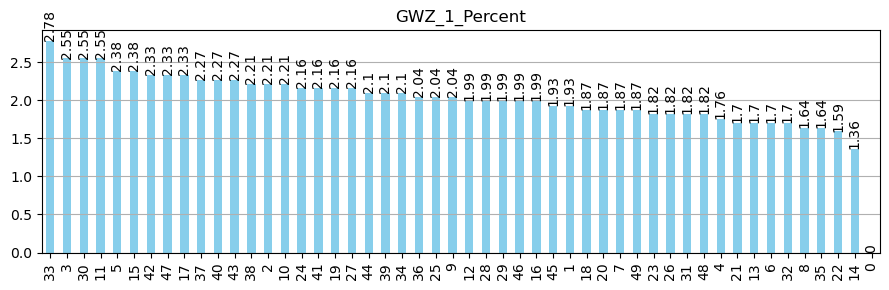

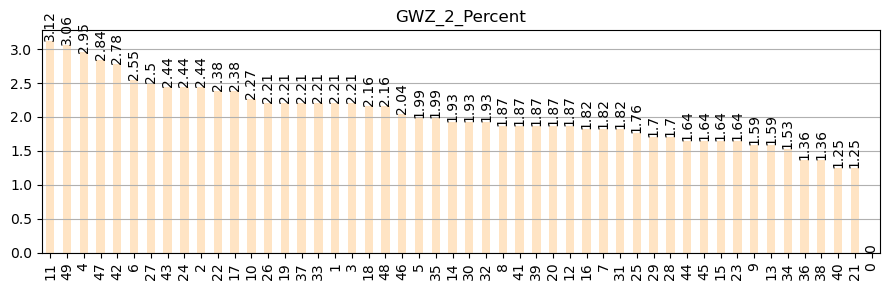

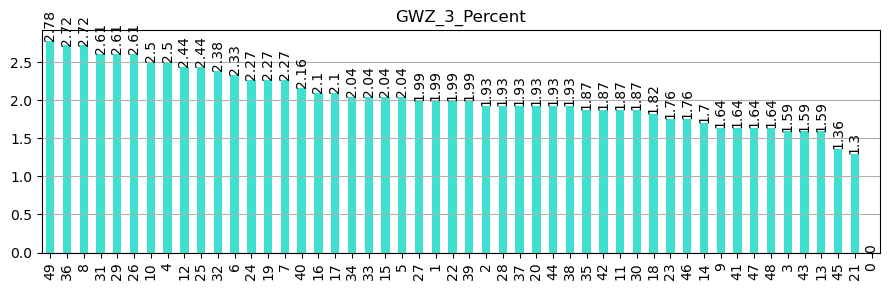

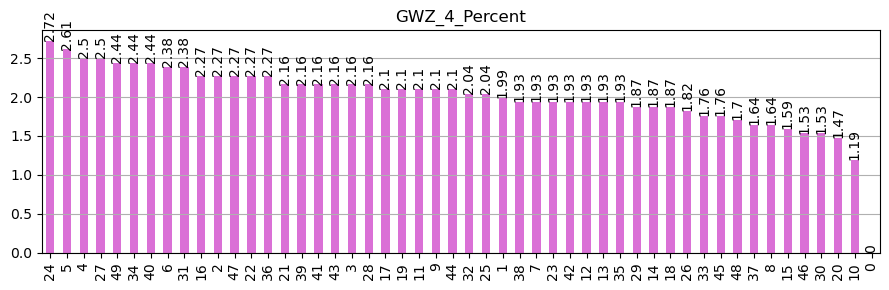

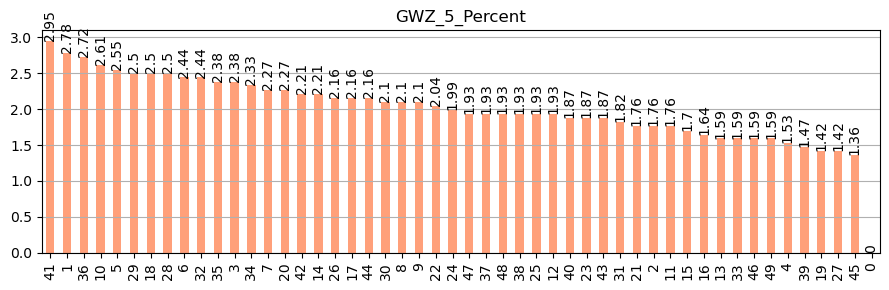

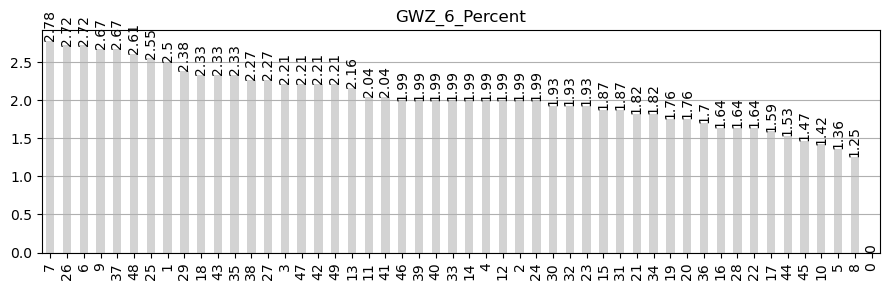

In [59]:
plot_percentages(df_t, 'GWZ_1_Percent', gwz_colors[0], False)
plot_percentages(df_t, 'GWZ_2_Percent', gwz_colors[1], False)
plot_percentages(df_t, 'GWZ_3_Percent', gwz_colors[2], False)
plot_percentages(df_t, 'GWZ_4_Percent', gwz_colors[3], False)
plot_percentages(df_t, 'GWZ_5_Percent', gwz_colors[4], False)
plot_percentages(df_t, 'GWZ_6_Percent', gwz_colors[5], False)

Sz

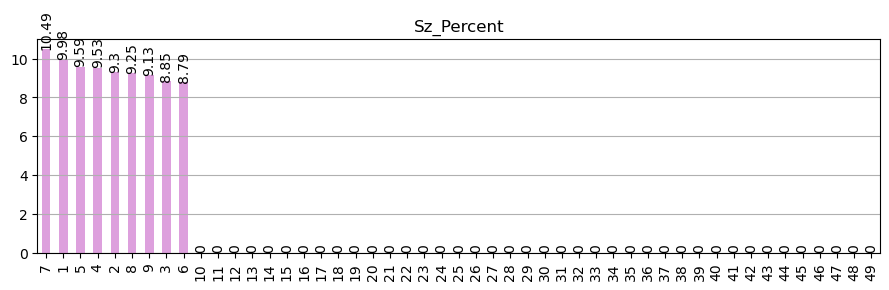

In [60]:
plot_percentages(df_t, 'Sz_Percent', gwz_colors[6], True)

Zz

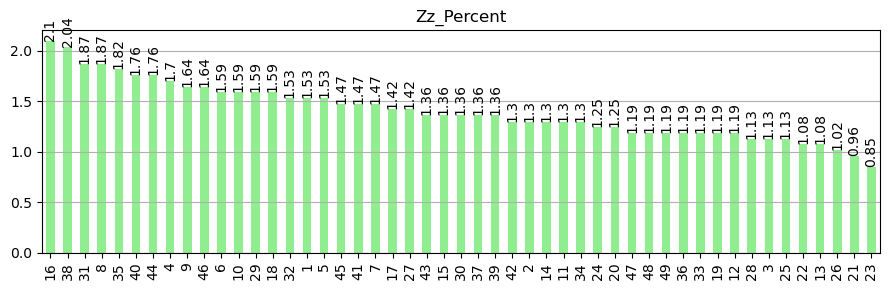

In [61]:
# zeros not to be included
plot_percentages(df_t, 'Zz_Percent', gwz_colors[7], True)

### 3.5 Winning Combinations

#### 3.5.1 Combination Recurrences

In [62]:
winning_combos = [lst for lst in df[winning_numbers].values.tolist()]
winning_combos[:5]

[[44, 45, 48, 12, 46, 30, 2, 0],
 [37, 33, 12, 6, 42, 15, 9, 0],
 [8, 42, 40, 1, 17, 18, 10, 0],
 [12, 10, 42, 6, 9, 37, 44, 0],
 [29, 46, 48, 42, 35, 20, 45, 0]]

In [63]:
print(f'There are {len(winning_combos)} combinations in the data set.')

There are 1763 combinations in the data set.


In [64]:
hashes = []
for lst in winning_combos:
    h_object = hashlib.sha256(str(lst).encode())
    h_hex = h_object.hexdigest()
    hashes.append(h_hex)

print(f'Nr of duplicate winning combos: {len(winning_combos) - len(hashes)}')

Nr of duplicate winning combos: 0


#### 3.5.2 Sums

In [65]:
def plot_textual_statistics(df, column_name):
    sum_list = df[column_name].describe().to_list()
    cnt = int(sum_list[0])
    q1 = int(sum_list[4])
    q3 = int(sum_list[6])
    print('Key statistics')
    display(df[column_name].describe())
    print('Examples of the 50% most frequent winning combinations')
    display(df[(df[column_name] >= q1) & (df[column_name] <= q3)])
    print('Example frequent winning combinations that belong to the most frequent combinations in sum ordered by year (combination sum == 149)')
    display(df.sort_values(by=column_name).iloc[int(cnt/2-5):int(cnt/2+5)].sort_values(by='Year').iloc[:, 0:11])

def plot_histogram(df, column_name, bin_count):
    plt.rcParams['figure.figsize'] = [6, 4]
    plt.figure(layout='tight')
    ax = df[column_name].plot.hist(bins=bin_count)
    ax.grid(True)
    ax.set_title('Combination sum frequencies')
    ax.set_xlabel('Combination sum')
    plt.show()

def plot_combination_statistics(df, column_name, bin_count):
    plot_histogram(df, column_name, bin_count)
    plot_textual_statistics(df, column_name)

def plot_even_odd_distributions(df, winning_numbers_columns, colors):
    row_count, col_count = 4, 2
    f, axs = plt.subplots(row_count, col_count, figsize=(8, 12))
    f.set_tight_layout(tight=True)
    i,j,k = 0,0,0
    for winning_number in winning_numbers_columns:
        if winning_number == 'Zz' or winning_number == 'Sz':
            pd.Series(df[df[winning_number] != 0][winning_number].values % 2).value_counts().sort_index().plot.bar(grid=True, xlabel='even/odd', ylabel='frequency', title=winning_number, color=colors[i], ax=axs[j,k])
        else:
            pd.Series(df[winning_number].values % 2).value_counts().sort_index().plot.bar(grid=True, xlabel='even/odd', ylabel='frequency', title=winning_number, color=colors[i], ax=axs[j,k])
        axs[j,k].bar_label(axs[j,k].containers[0], rotation=90)
        i+=1
        k=k+1
        if k >= col_count:
            k = 0
            j = j+1%row_count
    plt.show()

def plot_prime_number_count(df, winning_numbers):
    primes = [2,3,5,7,11,13,17,19,23,29,31,37,41,43,47]
    count_primes_func = lambda x: int(np.sum([1 for x in x if x in primes]))
    ax = pd.Series([count_primes_func(v) for v in df[winning_numbers].values.tolist()]).value_counts().sort_index().plot.bar()
    ax.grid(axis='y')
    ax.bar_label(ax.containers[0], rotation=90)
    ax.set_title('# of Primes in Winning Combinations')
    ax.set_xlabel('Prime')
    ax.set_ylabel('Frequency')
    plt.show()

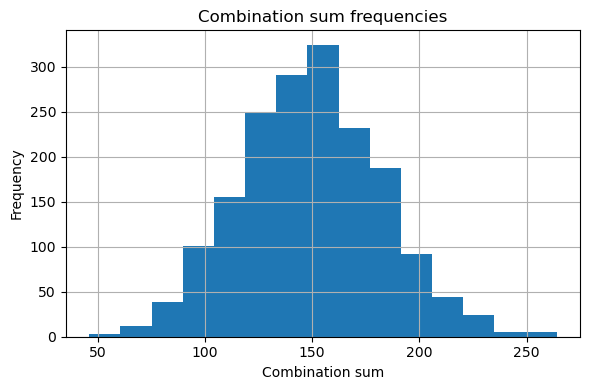

Key statistics


count    1763.000000
mean      149.163358
std        32.750310
min        46.000000
25%       127.000000
50%       149.000000
75%       170.500000
max       264.000000
Name: gwzx_sum, dtype: float64

Examples of the 50% most frequent winning combinations


,Year,MM/DD,Day,GWZ1,GWZ2,GWZ3,GWZ4,GWZ5,GWZ6,Zz,...,4T,VII,3T_Zz,VIII,3T,IX,2T_Zz,Total_payout,Date,gwzx_sum
1,1990,13/01/,SA,37,33,12,6,42,15,9,...,59.309643,0,0.0,1772874,4.908384,0,0.0,2.892594e+07,1990-01-13,145
6,1990,17/02/,SA,7,25,1,49,32,15,5,...,40.391910,0,0.0,1900483,4.499352,0,0.0,2.839943e+07,1990-02-17,129
8,1990,03/03/,SA,45,42,43,17,4,11,27,...,67.899315,0,0.0,1805875,4.652740,0,0.0,2.795148e+07,1990-03-03,162
9,1990,10/03/,SA,12,39,24,4,29,21,42,...,50.515453,0,0.0,2007143,4.294836,0,0.0,2.858155e+07,1990-03-10,129
13,1990,07/04/,SA,42,3,49,12,31,26,15,...,47.396584,0,0.0,2103618,4.141450,0,0.0,2.897335e+07,1990-04-07,163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2945,2023,09/09/,SA,42,28,48,2,25,22,0,...,61.100000,72633,21.5,578754,12.700000,569151,6.0,5.291194e+07,2023-09-09,167
2949,2023,23/09/,SA,33,11,39,32,17,12,0,...,39.200000,101140,16.0,873012,8.700000,713353,6.0,6.660778e+07,2023-09-23,144
2951,2023,30/09/,SA,45,42,17,20,36,1,0,...,63.000000,97765,23.7,833015,13.100000,759268,6.0,8.307498e+07,2023-09-30,161
2953,2023,07/10/,SA,23,32,11,22,42,14,0,...,52.700000,49283,29.3,593407,11.500000,370095,6.0,2.511946e+07,2023-10-07,144


Example frequent winning combinations that belong to the most frequent combinations in sum ordered by year (combination sum == 149)


,Year,MM/DD,Day,GWZ1,GWZ2,GWZ3,GWZ4,GWZ5,GWZ6,Zz,Sz
77,1991,29/06/,SA,5,4,27,47,24,42,45,0
217,1994,05/03/,SA,46,32,4,49,11,7,23,2
909,2004,06/03/,SA,38,46,24,1,37,3,20,4
1609,2010,20/11/,SA,32,4,34,17,29,33,46,5
1663,2011,28/05/,SA,46,4,19,17,34,29,37,6
1841,2013,09/02/,SA,22,26,20,5,47,29,25,5
2167,2016,26/03/,SA,31,1,41,40,3,33,0,5
2221,2016,01/10/,SA,20,34,25,37,7,26,0,1
2323,2017,23/09/,SA,10,15,44,19,23,38,0,6
2813,2022,04/06/,SA,42,6,33,11,23,34,0,4


In [66]:
plot_combination_statistics(df, 'gwzx_sum', 15)

<b>Note:</b><br>Single year analysis (e.g. combination sums of year 2020) did not yield any valuable information due to there being insufficient data points to be representative

#### 3.5.3 Even/Odd Distribution of Sums

In [67]:
pd.Series(np.sum(df[['GWZ1','GWZ2','GWZ3','GWZ4','GWZ5','GWZ6']].values, axis=1) % 2).value_counts().sort_index()

0    890
1    873
Name: count, dtype: int64

<b>Note:</b><br>Imbalance is statistically insignificant

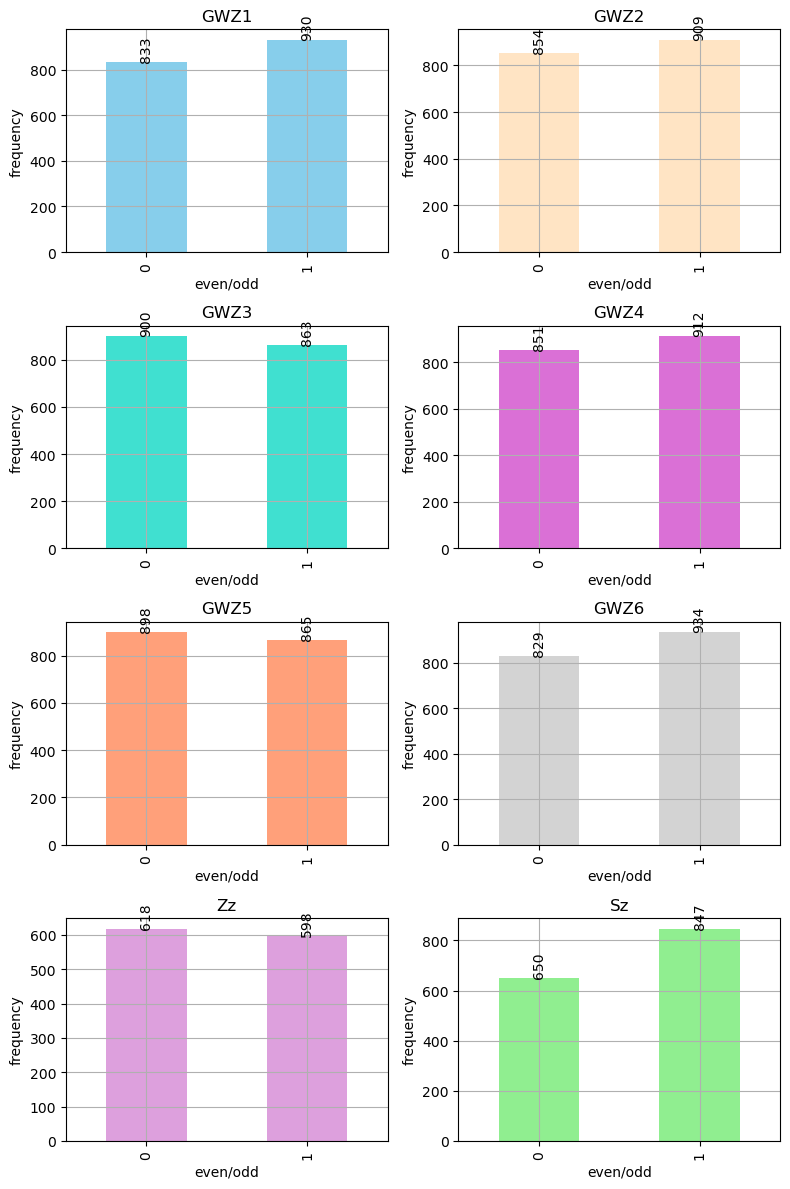

In [68]:
plot_even_odd_distributions(df, winning_numbers, gwz_colors)

#### 3.5.4 Primes

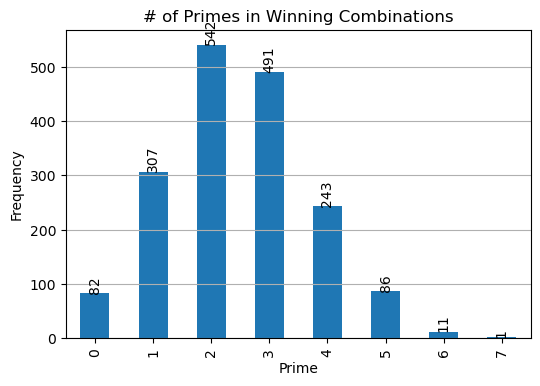

In [69]:
plot_prime_number_count(df, winning_numbers)